In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [2]:
# Loading Mnist data
x, y = load_digits()["data"], load_digits()["target"]
x, y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [3]:
x.dtype, y.dtype, x.shape, y.shape

(dtype('float64'), dtype('int32'), (1797, 64), (1797,))

In [4]:
# change y dtype to float64
y = y.astype(np.float64)

In [5]:
x.dtype, y.dtype, x.shape, y.shape

(dtype('float64'), dtype('float64'), (1797, 64), (1797,))

In [23]:
# merge data and shuffle
data_concat = np.column_stack((x,y))
np.random.shuffle(data_concat)

In [57]:
x, y = data_concat[ : , :64], data_concat[: , 64]

In [67]:
x_train, y_train = x[0: 1500] , y[0: 1500]
x_test, y_test = x[1500 : 1797], y[1500 : 1797]

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

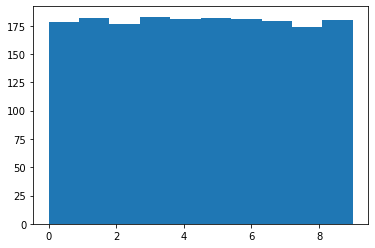

In [68]:
# As classes são próximas entre si.
plt.hist(y, bins=10, )

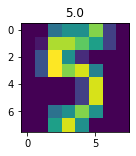

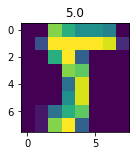

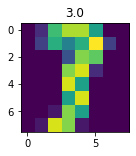

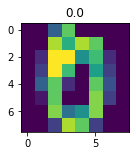

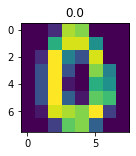

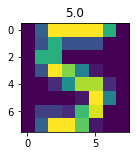

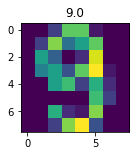

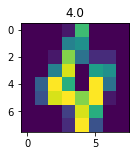

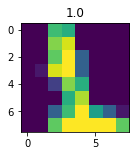

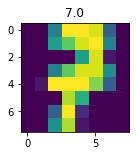

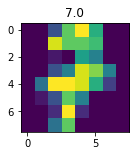

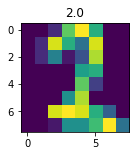

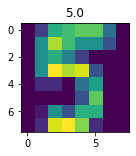

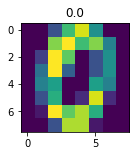

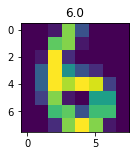

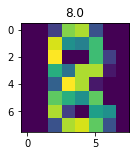

In [73]:
for i in range(16):
    plt.figure(figsize=(2,2))
    plt.imshow(x_train.reshape(x_train.shape[0],8, 8)[i])
    plt.title(f"{y_train[i]}")
    plt.show()

In [74]:
# normalizar os dados:
x_train, x_test = x_train / 255.0 , x_test / 255.0

In [97]:
# one hot encode y_train and y_test
y_train = np.array(pd.get_dummies(y_train)).astype(np.float64)
y_test = np.array(pd.get_dummies(y_test)).astype(np.float64)

### Construindo a rede

In [109]:
# tamanho das camadas:
def layer_size(x, y):
    n_x = x.shape[1]
    n_h = 4 # número de camadas ocultas
    n_y = y.shape[1]
    return(n_x, n_h, n_y)

In [110]:
# inicialização dos componentes
def initialize_parameter(n_x, n_h, n_y):
    w1 = np.random.randn(n_h[0], n_x) * 0.1
    b1 = np.zeros(shape=(n_h[0], 1))
    
    w2 = np.random.randn(n_h[1], n_h[0]) * 0.1
    b2 = np.zeros(shape=(n_h[1], 1))
    
    w3 = np.random.randn(n_y, n_h[1]) * 0.1
    b3 = np.zeros(shape=(n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2,
        "w3" : w3,
        "b3" : b3
    }
    return(parameters)

In [111]:
# função ativação (Sigmoide)
def sigmoid(x):
    return( 1 / (1 + np.exp(-x)) )

def sigmoid_derivate(x):
    return ( x * (1 - x) )

In [134]:
# foward propagation - the scalar products
def forward_propagation(x, parameters):
    # coleta dos parametros
    w1, b1 = parameters["w1"], parameters["b1"]
    w2, b2 = parameters["w2"], parameters["b2"]
    w3, b3 = parameters["w3"], parameters["b3"]
    
    # Layer 1
    z1 = (np.dot(w1, x.T) + b1).T
    # ativação 1
    a1 = sigmoid(z1)
    
    #layer 2
    z2 = (np.dot(w2, a1.T) + b2).T
    # at 2
    a2 = sigmoid(z2)
    
    # layer 3
    z3 = ( np.dot( w3, a2.T ) + b3 ).T
    # Ativ 3
    a3 = sigmoid(z3)
    
    cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2,
        "z3" : z3,
        "a3" : a3
    }
    
    return (a3, cache)

In [ ]:
def compute_cost(a3, y):
    # n observations
    n = y.shape[0]
    
    # log das probadilidades das previsões
    logprobs = np.multiply(y, np.log(a3)) + np.multiply( (1 - y), np.log(1 - a3))
    
    # cost
    cost = -np.sum(logprobs) / n
    cost = float(np.squeeze(cost))
    
    return( cost )

In [ ]:
# backpropagation

